<a href="https://colab.research.google.com/github/deeplearner2019/Cache-in-C/blob/master/adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AdaBoost**


*   used iris dataset


      *   contains 3 classes
      *   one class is linearly separable from other 2 so it is a binary classification problem






In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [0]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)
classes=list(set(y))

In [0]:
#encodes labels with value between 0 and n_classes-1
encoder = LabelEncoder()
y = pd.Series(encoder.fit_transform(y))

In [0]:
#train-test split of x and y
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1)

In [0]:
#maximum number of estimators at which boosting is terminated
classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
classifier.fit(train_X, train_y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [0]:
predictions = classifier.predict(test_X)

In [0]:
#confusion matrix to comapre actual and prediction results
conf=confusion_matrix(test_y, predictions)
print(conf)


[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


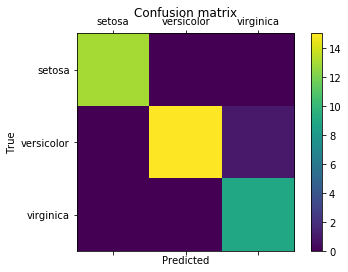

In [0]:
#creating a confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot  as plt


fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + classes)
ax.set_yticklabels([''] + classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
